<a href="https://colab.research.google.com/github/El-Do-RaDo/Tensorflow-Intro/blob/master/tensorflow_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to TensorFlow**

TensorFlow is a software library extensively used in machine learning. Here we'll learn how computations are represented and how to define a simple neural network in TensorFlow. For all the labs in 6.S191 2020, we'll be using the latest version of TensorFlow, TensorFlow 2, which affords great flexibility and the ability to imperatively execute operations, just like in Python. You'll notice that TensorFlow 2 is quite similar to Python in its syntax and imperative execution. Let's install TensorFlow and a couple of dependencies.

In [0]:
import tensorflow as tf

#install mit deeplearning package as this is mit deep learning from course
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

##  Why is TensorFlow called TensorFlow?
TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The shape of a Tensor defines its number of dimensions and the size of each dimension. The rank of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

Let's first look at 0-d Tensors, of which a scalar is an example:

In [0]:
sport = tf.constant("tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("sport is a {}-d tensor".format(tf.rank(sport).numpy()))
print("number is a {}-d tensor".format(tf.rank(number).numpy()))

sport is a 0-d tensor
number is a 0-d tensor


Vectors and lists can be used to create 1-d Tensors:

In [0]:
sports = tf.constant(["tennis", "basketball"], tf.string)
numbers = tf.constant([1.3786, 1.24578, 2.4273], tf.float64)

print("sports is a {}-d tensor".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("numbers is a {}-d tensor".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

sports is a 1-d tensor
numbers is a 1-d tensor


Next we consider creating 2-d (i.e., matrices) and higher-rank Tensors. For examples, in future labs involving image processing and computer vision, we will use 4-d Tensors. Here the dimensions correspond to the number of example images in our batch, image height, image width, and the number of color channels.

In [0]:
matrix = tf.constant([[1.2132,1.45,2.4545],[1.2577,3.45757,4.458]], tf.float64)

assert isinstance(matrix, tf.Tensor)
assert tf.rank(matrix).numpy() == 2

print("matrix is a {}-d tensor".format(tf.rank(matrix).numpy()))

matrix is a 2-d tensor


In [0]:
images = tf.zeros((10,256,256,3))

assert isinstance(images, tf.Tensor)
assert tf.rank(images).numpy() == 4
assert tf.shape(images).numpy().tolist() ==[10,256,256,3]

print("images is a {}-d tensor".format(tf.rank(images).numpy()))

images is a 4-d tensor


As you have seen, the shape of a Tensor provides the number of elements in each Tensor dimension. The shape is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank Tensor:



In [0]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1,2]

print("row vector: {}".format(row_vector.numpy()))
print("column vector: {}".format(column_vector.numpy()))
print("scalar: {}".format(scalar.numpy()))

row vector: [1.2577  3.45757 4.458  ]
column vector: [2.4545 4.458 ]
scalar: 4.458



#  Computations on Tensors
A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:

![alt text](https://camo.githubusercontent.com/38d69872497861176d1231c3e1c6c3ef61270e44/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f61616d696e692f696e74726f746f646565706c6561726e696e672f6d61737465722f6c6162312f696d672f6164642d67726170682e706e67)

In [0]:
a = tf.constant(15)
b = tf.constant(61)

c1 = tf.add(a,b)
c2 = a+b
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Now let's consider a slightly more complicated example:

![alt text](https://camo.githubusercontent.com/51a0292c93d9f6c25ad9a834c92e06e850e38e04/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f61616d696e692f696e74726f746f646565706c6561726e696e672f6d61737465722f6c6162312f696d672f636f6d7075746174696f6e2d67726170682e706e67)


Here, we take two inputs, a, b, and compute an output e. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [0]:
def func(a,b):
    c = tf.add(a,b)
    d = tf.subtract(b, 1)
    e = tf.multiply(c,d)
    return e

a, b = 1.5, 2.5
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


 #  Neural networks in TensorFlow
We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

Let's first consider the example of a simple perceptron defined by just one dense layer: $ y = \sigma(Wx + b)$, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output. We can also visualize this operation using a graph:

![alt text](https://camo.githubusercontent.com/e31abc1367dbb092c50c3759e202d15b30afb95e/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f61616d696e692f696e74726f746f646565706c6561726e696e672f6d61737465722f6c6162312f696d672f636f6d7075746174696f6e2d67726170682d322e706e67)

Tensors can flow through abstract types called Layers -- the building blocks of neural networks. Layers implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity. We will first define a Layer to implement the simple perceptron defined above.

In [6]:
class OurDenseLayer(tf.keras.layers.Layer):

    def __init__(self, n_output_nodes):
        super(OurDenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes
    
    def build(self, input_shape):
        d = int(input_shape[-1])
        self.W = self.add_weight("weight", shape=[d, self.n_output_nodes])
        self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])

    def call(self, x):
        z = tf.add(tf.matmul(x, self.W), self.b)
        y = tf.sigmoid(z)
        return y
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.0]], shape=(1,2))
y = layer.call(x_input)
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.2697859  0.45750418 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3

model = Sequential()
dense_layer = (Dense(n_output_nodes, input_shape=(2,)))

model.add(dense_layer)

In [12]:
x_input = tf.constant([[1,2.]], shape=(1,2))

model_output = model.call(x_input)
print(model_output)

tf.Tensor([[-0.84747624  0.52264667 -0.06161666]], shape=(1, 3), dtype=float32)


In addition to defining models using the Sequential API, we can also define neural networks by directly subclassing the Model class, which groups layers together to enable model training and inference. The Model class captures what we refer to as a "model" or as a "network". Using Subclassing, we can create a class for our model, and then define the forward pass through the network using the call function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network as above now using Subclassing rather than the Sequential model.

In [14]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        self.dense_layer = (Dense(n_output_nodes, input_shape=(2,)))

    def call(self, inputs):
        return self.dense_layer(inputs)

n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[-1.4054141  0.5451114  1.1903379]], shape=(1, 3), dtype=float32)


In [17]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        if isidentity:
            return inputs
        return x

n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print("Network output with activation: {}; \nNetwork identity output: {}".format(out_activate.numpy(), out_identity.numpy()))


Network output with activation: [[0.11969814 0.43011418 0.34748617]]; 
Network identity output: [[1. 2.]]


# Automatic differentiation in TensorFlow
Automatic differentiation is one of the most important parts of TensorFlow and is the backbone of training with backpropagation. We will use the TensorFlow GradientTape tf.GradientTape to trace operations for computing gradients later.

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular tf.GradientTape can only compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a persistent gradient tape.

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function $ y = x^2$ and compute the gradient:

In [0]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x * x

dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how GradientTape can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to minimize. While we can clearly solve this problem analytically ($x_{min}=x_f$), considering how we can compute this using GradientTape sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=[[-0.39749852]]


Text(0, 0.5, 'x value')

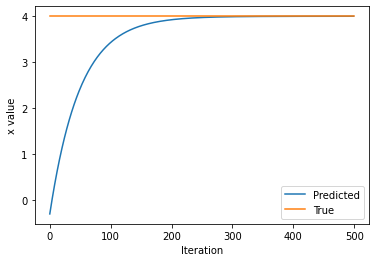

In [23]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 
history = []

x_f = 4


for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - x_f) ** 2
    


    grad = tape.gradient(loss, x)
    new_x = x - learning_rate*grad 
    x.assign(new_x) 
    history.append(x.numpy()[0])


plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
